# Project 3
Griffith Stites and Alex Hindelang

## Assumptions
* Ignoring temperature changes for the fluid and how this effects density. Just choosing based off of the ideal temperature from the engineeringtoolbox chart
* That the force of the penguin exerted on the fluid does not change based on fluid density.

## To Do
* Calculate Emperor penguin Coefficient of drag
* Find Emperor penguin frontal area
* Add QMRI details
* Make it so the penguin goes to the end of the pool and turns around?
* Add penguin speed (In results) in kph as well as m/s
* Add graph label with penguin type and fluid density (Could just be print out)

# Question

In [442]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# import matlab like plotting functions
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure

# Model

In [443]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
km = UNITS.kilometer
hr = UNITS.hour
s = UNITS.second
N = UNITS.newton

<Unit('newton')>

rho_water

C_d = Coeffient of drag of the penguin

frontal_area = The frontal area of the penguin

velocity_init = starting velocity of the penguin

pool_length = length of the pool. An olympic swimming pool is 50 m

C_d and frontal_area are currently for the gentoo penguin

In [444]:
rho_water = 1000 * kg/m**3
rho_sea_water = 1025 * kg/m**3
rho_syrup = 1370 * kg/m**3
rho_propyl_alcohol = 800 * kg/m**3
rho_air = 1.2 * kg/m**3

gentoo_mass =  5.8967 * kg
params = Params(rho = rho_sea_water,
                C_d = 0.07,
                frontal_area = 0.02 * m**2,
                velocity_init = 0 * m / s,
                pool_length = 50 * m,
                penguin_mass = gentoo_mass
)

,values
rho,1025.0 kilogram / meter ** 3
C_d,0.07
frontal_area,0.02 meter ** 2
velocity_init,0.0 meter / second
pool_length,50 meter
penguin_mass,5.8967 kilogram


In [445]:
def make_system(params):
    """Make a system object.
    
    params: Params object with
    
    returns: System object"""
    unpack(params)
    init = State(x=0 * m, v=velocity_init)
    t_end = 100 * s
    
    return System(params, init=init, t_end=t_end)

In [446]:
system = make_system(params)

,values
rho,1025.0 kilogram / meter ** 3
C_d,0.07
frontal_area,0.02 meter ** 2
velocity_init,0.0 meter / second
pool_length,50 meter
penguin_mass,5.8967 kilogram
init,x 0 meter v 0.0 meter / secon...
t_end,100 second


In [447]:
def force_drag(V, system):
    """Computes drag force in the opposite direction of 'v'.
    
    V: velocity
    system: System object with rho, C_d, area
    
    returns: scalar drag force
    """
    unpack(system)
    f_drag_mag = -rho * V**2 * C_d * frontal_area / 2
    return f_drag_mag

Force of the penguin can be determined by finding the maximum speed of a penguin in salt water. Assuming that the drag force of the salt water is equal to the force of the penguin swimming and by knowing the drag coefficient of the penguin we can determine the swimming force of the penguin.

In [460]:
def force_penguin_calc(max_speed, system):
    """Computes the force the penguin exerts on the fluid.
    
    max_speed: max speed in the fluid
    system: System object with rho, C_d, area
    
    returns: scalar penguin force"""
    f_drag = force_drag(max_speed, system)
    f_penguin = - f_drag
    return f_penguin

In [449]:
def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State ()
    t: time
    system: System object with
    
    returns: derivatives of y and v
    """
    x, v = state
    unpack(system)    

    f_drag = force_drag(v, system)
    f_penguin = force_penguin
    
    f_total = f_penguin + f_drag
    
    dydt = v
    dvdt = f_total / penguin_mass #acceleration
    
    return dydt, dvdt

In [450]:
def event_func(state, t, system):
    """Return the ditance of the penguin in the pool.
    
    state: state object with the position and velocity of the penguin
    t: int representing the time the model is at
    system: system object with the model params
    """
    x, v = state
    return x - system.pool_length

In [451]:
def analyze_results(results, system, title):
    """Plot the results of a penguin model and provide summary statements.
    
    results: Dataframe with the results of the model
    system: System object for the model
    title: String with title of the model"""
    
    plot_info(system)
    
    #Changes the size of the figure
    figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
    #Changes the font of the figure
    font = {'family' : 'DejaVu Sans',
            'weight' : 'normal',
            'size'   : 30}
    matplotlib.rc('font', **font)

    #Creates the position vs time plot
    plt.subplot(1, 2, 1)
    plt.plot(results.index, results.x, color='lightgreen', linewidth=7.0)
    plt.title(title + ': Position vs Time', fontsize = 40)
    plt.xlabel('Time (Seconds)', fontsize = 20)
    plt.ylabel('Position (Meters)', fontsize = 20)
    
    #Creates the velocity vs time plot
    plt.subplot(1, 2, 2)
    plt.plot(results.index, results.v, color='lightblue', linewidth=7.0)
    plt.title(title + ': Velocity vs Time', fontsize = 40)
    plt.xlabel('Time (Seconds)', fontsize = 20)
    plt.ylabel('Velocity (m/s)', fontsize = 20)
    
    plt.show()
    
    calc_total_time(results)
    calc_max_speed(results)

In [452]:
def plot_info(system):
    """Print the penguin mass and fluid density for the plot.
    
    system: System object
    """
    penguin_mass = system.penguin_mass
    penguin_mass_str = str(penguin_mass)
    print('\x1b[1;31m'+'Penguin mass: '+'\x1b[0m', 
          '\x1b[1;31m'+ penguin_mass_str +'\x1b[0m')
    rho = system.rho
    rho_str = str(rho)
    print('\x1b[1;31m'+'Fluid density: '+'\x1b[0m', 
          '\x1b[1;31m'+ rho_str +'\x1b[0m')

In [453]:
def calc_total_time(results):
    """Calculate and print the total time.
    
    results: DataFrame
    """
    time = round(results.last_valid_index(), 2)
    time_str = str(time)  
    print('\x1b[1;31m'+'The total time it took the penguin to get to the end of the pool was'+'\x1b[0m', 
          '\x1b[1;31m'+ time_str +'\x1b[0m', '\x1b[1;31m'+'seconds.'+'\x1b[0m')

In [454]:
def calc_max_speed(results):
    """Calculate and print the max speed of the penguin in the fluid.
    
    results: DataFrame
    """
    velocity = round(get_last_value(results.v), 2)
    velocity_str = str(velocity)
    print('\x1b[1;31m'+'The final speed of the penguin was'+'\x1b[0m', 
          '\x1b[1;31m'+ velocity_str +'\x1b[0m', '\x1b[1;31m'+'meters per second.'+'\x1b[0m')

# Results

Setting the force of the penguin to represent the Gentoo penguin.


In [463]:
gentoo_max_speed = 36 * km / hr
gentoo_max_speed = 10 * m / s
force_penguin = force_penguin_calc(gentoo_max_speed, system)

<Quantity(71.75000000000001, 'kilogram * meter / second ** 2')>

Testing the Gentoo penguin in the different substances.

Penguin mass:  35.02 kilogram
Fluid density:  1025.0 kilogram / meter ** 3


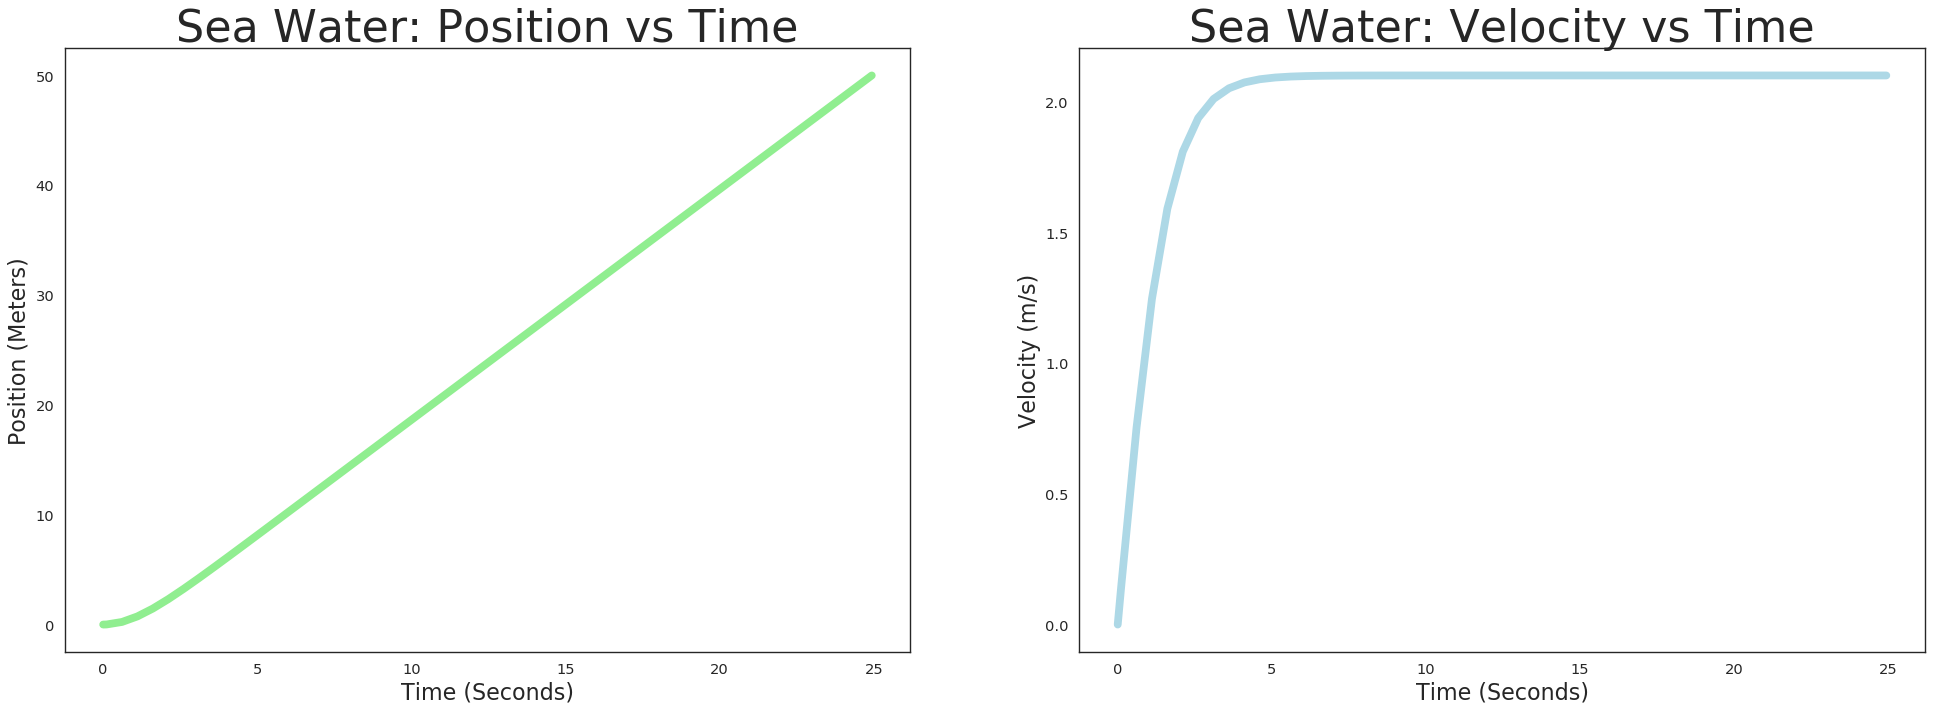

The total time it took the penguin to get to the end of the pool was 24.94 seconds.
The final speed of the penguin was 2.1 meters per second.


In [468]:
params.rho = rho_sea_water
system = make_system(params)
results, details = run_ode_solver(system, slope_func, events=event_func, max_step =.5)
analyze_results(results, system, 'Sea Water')

The original question that inspired us to make this model: What happens if a penguin swims in syrup? (Ignoring the sugary effect on the penguin. I choose to believe that the penguin would just want to eat it right up).

Penguin mass:  5.8967 kilogram
Fluid density:  1370.0 kilogram / meter ** 3


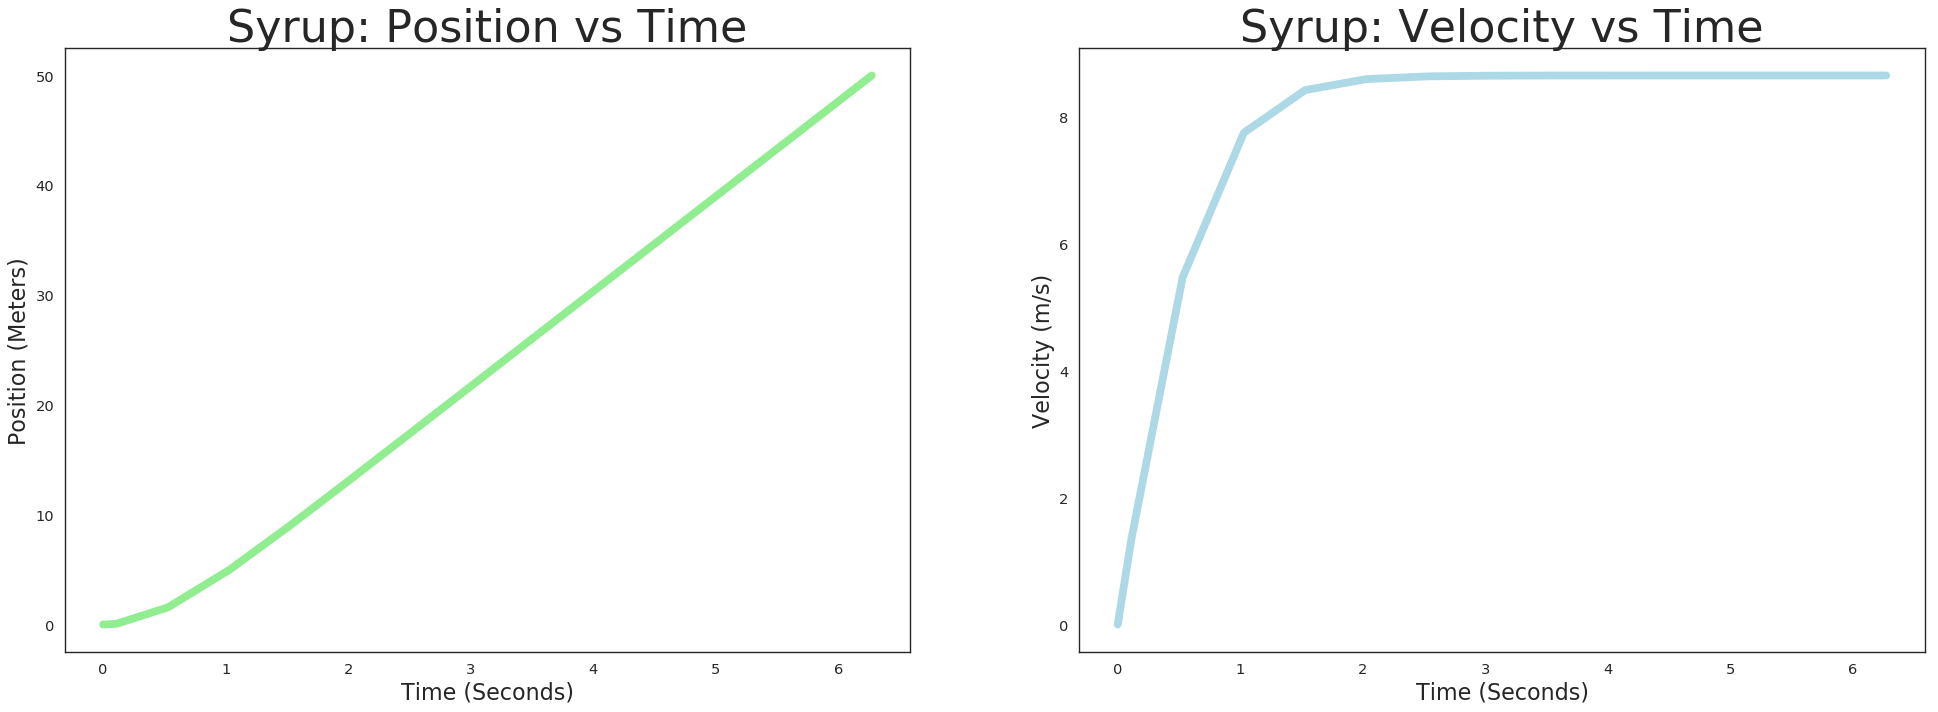

The total time it took the penguin to get to the end of the pool was 6.27 seconds.
The final speed of the penguin was 8.65 meters per second.


In [433]:
params.rho = rho_syrup
system = make_system(params)
results, details = run_ode_solver(system, slope_func, events=event_func, max_step =.5)
analyze_results(results, system, 'Syrup')

Penguin mass:  5.8967 kilogram
Fluid density:  800.0 kilogram / meter ** 3


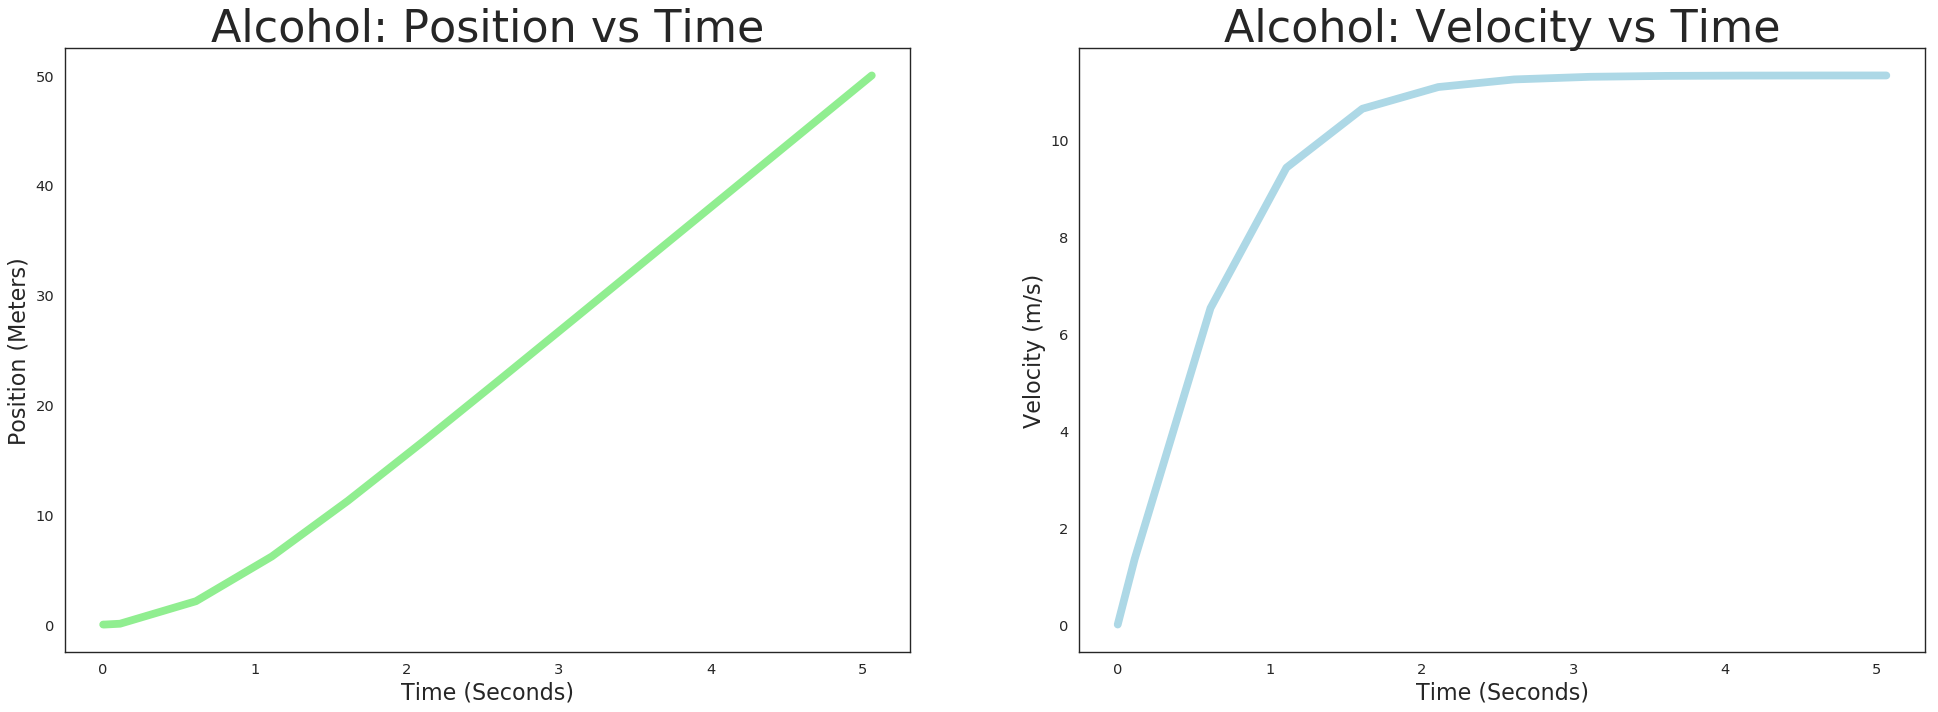

The total time it took the penguin to get to the end of the pool was 5.06 seconds.
The final speed of the penguin was 11.32 meters per second.


In [434]:
params.rho = rho_propyl_alcohol
system = make_system(params)
results, details = run_ode_solver(system, slope_func, events=event_func, max_step =.5)
analyze_results(results, system, 'Alcohol')

Penguin mass:  5.8967 kilogram
Fluid density:  1.2 kilogram / meter ** 3


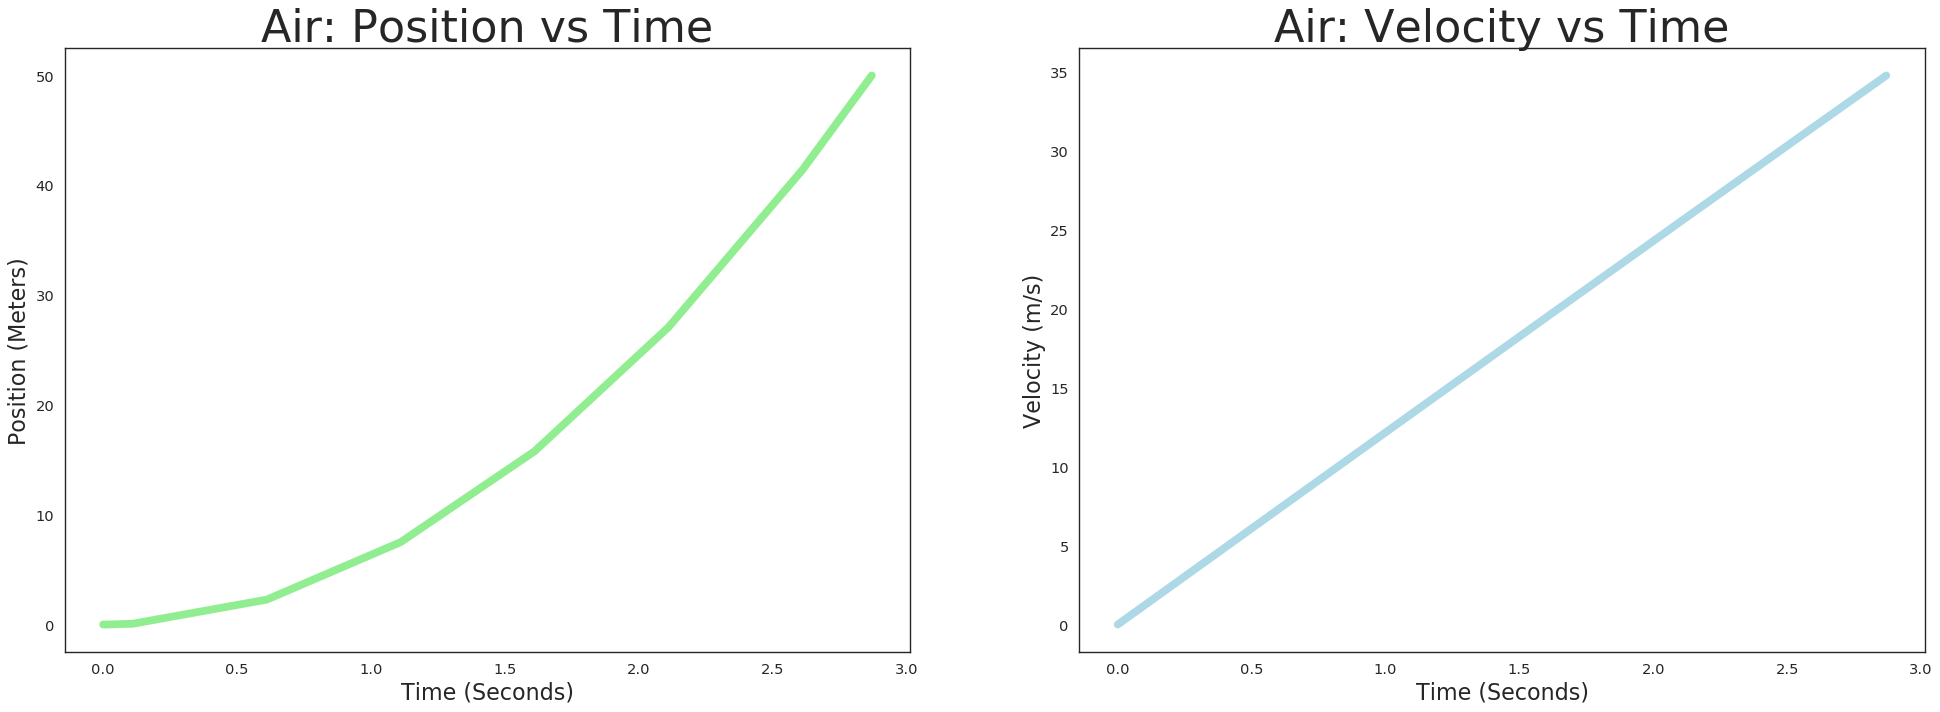

The total time it took the penguin to get to the end of the pool was 2.87 seconds.
The final speed of the penguin was 34.76 meters per second.


In [435]:
params.rho = rho_air
system = make_system(params)
results, details = run_ode_solver(system, slope_func, events=event_func, max_step =.5)
analyze_results(results, system, 'Air')

Trying the sea water results with a different penguin.

In [466]:
emperor_mass = 35.02 * kg
emperor_drag_coefficient = 0.5 #RECALCULATE. THIS IS MADE UP
emperor_frontal_area = .04 * m**2 #RECALCULATE. THIS IS MADE UP
emperor_max_speed = 2.1 * m/s

params.penguin_mass = emperor_mass
params.rho = rho_sea_water 
params.C_d = emperor_drag_coefficient
params.frontal_area = emperor_frontal_area

system = make_system(params)
force_penguin = force_penguin_calc(emperor_max_speed, system)

<Quantity(45.2025, 'kilogram * meter / second ** 2')>

Penguin mass:  35.02 kilogram
Fluid density:  1025.0 kilogram / meter ** 3


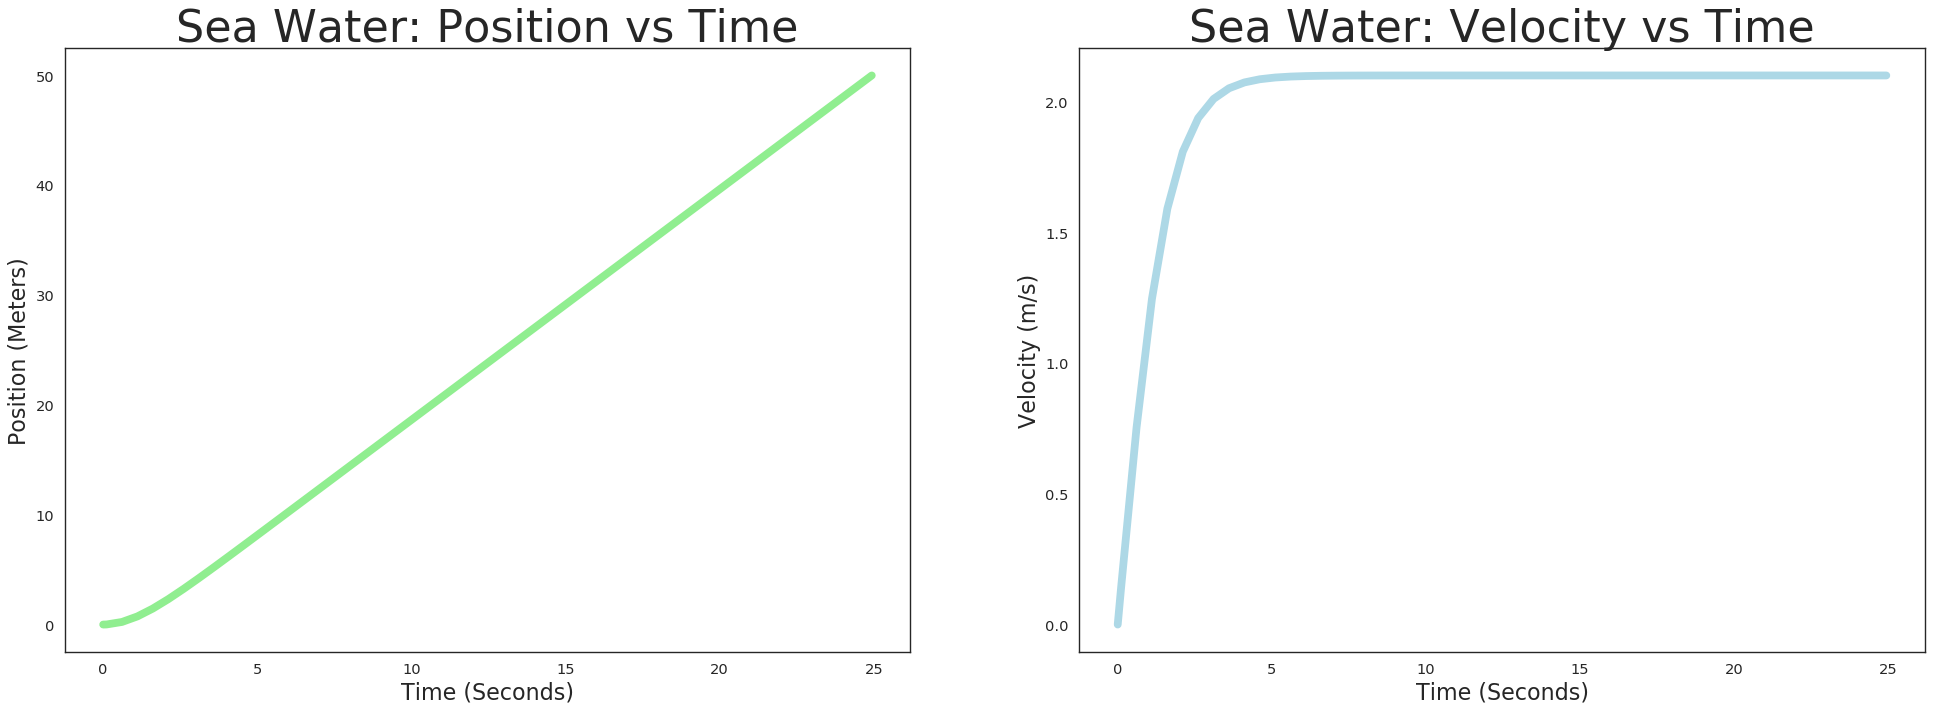

The total time it took the penguin to get to the end of the pool was 24.94 seconds.
The final speed of the penguin was 2.1 meters per second.


In [469]:
params.rho = rho_sea_water
system = make_system(params)
results, details = run_ode_solver(system, slope_func, events=event_func, max_step =.5)
analyze_results(results, system, 'Sea Water')

# Interpretation